#Weekly Assessment 7

Instructions:

1. Sign the Honor Pledge.
2. In addition to your own notes and books, online resources can also be used but you have to provide reference(s).

Honesty Pledge:


I pledge on my honor that I have not given or received any unauthorized assistance on this exam/assignment.

Indicate your Name / Date: 
Kyle Matthew M. Cayanan / 5/12/2023
---



1. [30 pts] Would you use the adjacency matrix structure or the adjacency list structure in each of the following cases? Justify your choice. 

a. The graph has 10,000 vertices and 20,000 edges, and it is important to use as little space as possible.

b. The graph has 10,000 vertices and 20,000,000 edges, and it is im- portant to use as little space as possible.

c. You need to answer the query get edge(u,v) as fast as possible, no matter how much space you use.

### Answer
a. The graph has 10,000 vertices and 20,000 edges, and it is important to use as little space as possible.

Answer: Adjacency List Structure

Justification:
- The Adjacency List will only need to store 10,000 {list} and 20,000 {touples}. If going by technicalities, thats 40,000 {elements}
- On the other hand, the Adjacency Matrix will need 10,000 x 10,000 spaces to represent the structure. This is a total of 100 thousand elements that will either be {one} or {zero}
- 40,000 < 100,000 therefore Adjacency List is the best

b. The graph has 10,000 vertices and 20,000,000 edges, and it is im- portant to use as little space as possible.

Answer: Adjacency Matrix Structure

Justification:
- The Adjacency Matrix only needs to store 100,000 elemenst (10k x 10k) matrix. This is regardless of the 20,000,000 edges
- On the other hand, the Adjacency List needs one touple for every edge. This is a total of 20,000,000 touples, or 40,000,000 elements.
- 100,000 < 20,000,000 < 40,000,000 therefore the Adjacency Matrix is the best

c. You need to answer the query get edge(u,v) as fast as possible, no matter how much space you use.

Answer: Adjacency Matrix

Justification:
- The Adjacency Matrix can be accessed the fastest because of indexing. You can simply get the row and column then check if it is equal to 1
- On the other hand, the Adjaceny list needs to be traversed for all {u} lists. Then it needs to be traversed for all {v} touples.

2. [30 pts] Let $G$ be an undirected graph whose vertices are the integers 1 through 8, and let the adjacent vertices of each vertex be given by the table below:

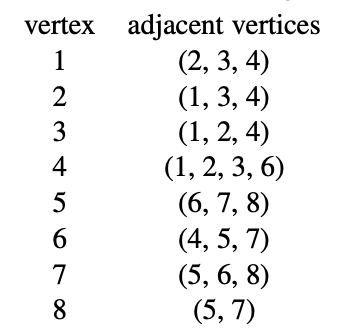

Assume that, in a traversal of $G$, the adjacent vertices of a given vertex are returned in the same order as they are listed in the table above.

a. Draw $G$.

b. Give the sequence of vertices of $G$ visited using a DFS traversal
starting at vertex 1.

c. Give the sequence of vertices visited using a BFS traversal starting
at vertex 1.

###Answer:
a) 
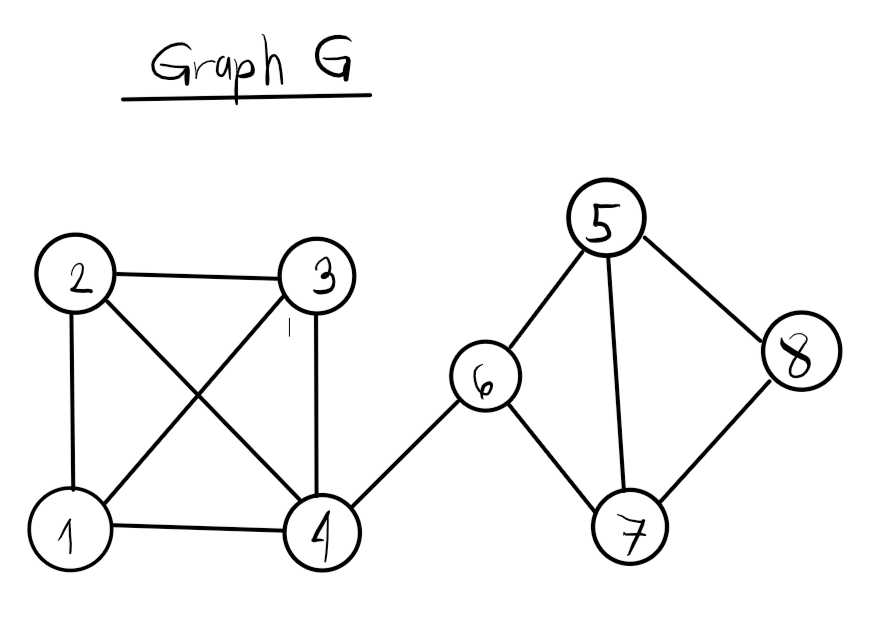

b) 1,2,3,4,6,5,7,8

c) 1,2,3,4,6,5,7,8

3. [40 pts] An adjacency map is very similar to an adjacency list, but the secondary container of all edges incident to a vertex is organized as a map, rather than as a list, with the adjacent vertex serving as a key. This allows for access to a specific $edge (u,v)$ in $O(1)$ expected time.

Create a ```remove_vertex(v)``` method for our adjacency map implementation below, making sure your implementation works for both directed and undirected graphs. Your method should run in $O(deg(v))$ time.

**Provide your code and attached a recorded audio explanation (You can use online tools like http://veed.io to record your audio).**

In [24]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

class Graph:
  """Representation of a simple graph using an adjacency map."""

  #------------------------- nested Vertex class -------------------------
  class Vertex:
    """Lightweight vertex structure for a graph."""
    __slots__ = '_element'
  
    def __init__(self, x):
      """Do not call constructor directly. Use Graph's insert_vertex(x)."""
      self._element = x
  
    def element(self):
      """Return element associated with this vertex."""
      return self._element
  
    def __hash__(self):         # will allow vertex to be a map/set key
      return hash(id(self))

    def __str__(self):
      return str(self._element)
    
  #------------------------- nested Edge class -------------------------
  class Edge:
    """Lightweight edge structure for a graph."""
    __slots__ = '_origin', '_destination', '_element'
  
    def __init__(self, u, v, x):
      """Do not call constructor directly. Use Graph's insert_edge(u,v,x)."""
      self._origin = u
      self._destination = v
      self._element = x
  
    def endpoints(self):
      """Return (u,v) tuple for vertices u and v."""
      return (self._origin, self._destination)
  
    def opposite(self, v):
      """Return the vertex that is opposite v on this edge."""
      if not isinstance(v, Graph.Vertex):
        raise TypeError('v must be a Vertex')
      return self._destination if v is self._origin else self._origin
      raise ValueError('v not incident to edge')
  
    def element(self):
      """Return element associated with this edge."""
      return self._element
  
    def __hash__(self):         # will allow edge to be a map/set key
      return hash( (self._origin, self._destination) )

    def __str__(self):
      return '({0},{1},{2})'.format(self._origin,self._destination,self._element)
    
  #------------------------- Graph methods -------------------------
  def __init__(self, directed=False):
    """Create an empty graph (undirected, by default).

    Graph is directed if optional paramter is set to True.
    """
    self._outgoing = {}
    # only create second map for directed graph; use alias for undirected
    self._incoming = {} if directed else self._outgoing

  def _validate_vertex(self, v):
    """Verify that v is a Vertex of this graph."""
    if not isinstance(v, self.Vertex):
      raise TypeError('Vertex expected')
    if v not in self._outgoing:
      raise ValueError('Vertex does not belong to this graph.')
    
  def is_directed(self):
    """Return True if this is a directed graph; False if undirected.

    Property is based on the original declaration of the graph, not its contents.
    """
    return self._incoming is not self._outgoing # directed if maps are distinct

  def vertex_count(self):
    """Return the number of vertices in the graph."""
    return len(self._outgoing)

  def vertices(self):
    """Return an iteration of all vertices of the graph."""
    return self._outgoing.keys()

  def edge_count(self):
    """Return the number of edges in the graph."""
    total = sum(len(self._outgoing[v]) for v in self._outgoing)
    # for undirected graphs, make sure not to double-count edges
    return total if self.is_directed() else total // 2

  def edges(self):
    """Return a set of all edges of the graph."""
    result = set()       # avoid double-reporting edges of undirected graph
    for secondary_map in self._outgoing.values():
      result.update(secondary_map.values())    # add edges to resulting set
    return result

  def get_edge(self, u, v):
    """Return the edge from u to v, or None if not adjacent."""
    self._validate_vertex(u)
    self._validate_vertex(v)
    return self._outgoing[u].get(v)        # returns None if v not adjacent

  def degree(self, v, outgoing=True):   
    """Return number of (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to count incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    return len(adj[v])

  def incident_edges(self, v, outgoing=True):   
    """Return all (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to request incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    for edge in adj[v].values():
      yield edge

  def insert_vertex(self, x=None):
    """Insert and return a new Vertex with element x."""
    v = self.Vertex(x)
    self._outgoing[v] = {}
    if self.is_directed():
      self._incoming[v] = {}        # need distinct map for incoming edges
    return v
      
  def insert_edge(self, u, v, x=None):
    """Insert and return a new Edge from u to v with auxiliary element x.

    Raise a ValueError if u and v are not vertices of the graph.
    Raise a ValueError if u and v are already adjacent.
    """
    if self.get_edge(u, v) is not None:      # includes error checking
      raise ValueError('u and v are already adjacent')
    e = self.Edge(u, v, x)
    self._outgoing[u][v] = e
    self._incoming[v][u] = e

# YOUR CODE HERE
    def remove_vertex(self,v):
        #validate if the vertex exists
        self._validate_vertex(v)
        
        #check every existing vertex in the outgoing list
        #this is undirected, therefore incoming list will also be traversed at the same time
        for i in self._outgoing:
            
            #if the vertex itself is found
            if(i==v):
                #ignore for now
            else:
                
                #if edges exist between V and another vertex (i)
                #delete all edges
                if self.get_edge(v, i) is not None:
                        self._outgoing[i][v] = None
                        self._incoming[v][i] = None
        
        #delete the vertex itself
        self._outgoing[v] = None
        self._incoming[v] = None

Link to your recorded audio explanation:   
https://www.veed.io/view/32270f0a-5a61-4c94-adc3-8ecf37d617ef?panel=share